## 다루고자 하는 주제
- Data definition
- Hypothesis
- Compute loss
- Gradient descent

### Data definition

In [1]:
import torch
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [2]:
x_train

tensor([[1.],
        [2.],
        [3.]])

In [3]:
y_train

tensor([[2.],
        [4.],
        [6.]])

### Hypothesis

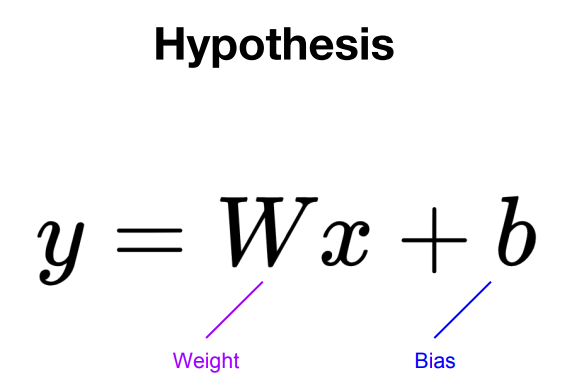

$ H(x) = Wx + b $

- Weight와 Bias 0으로 초기화
 - 항상 출력 0을 예측

In [4]:
# requires_grad = True, 학습할 것이라고 명시
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1 ,requires_grad = True)
hypothesis = W * x_train + b

In [5]:
hypothesis

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)

### Compute loss

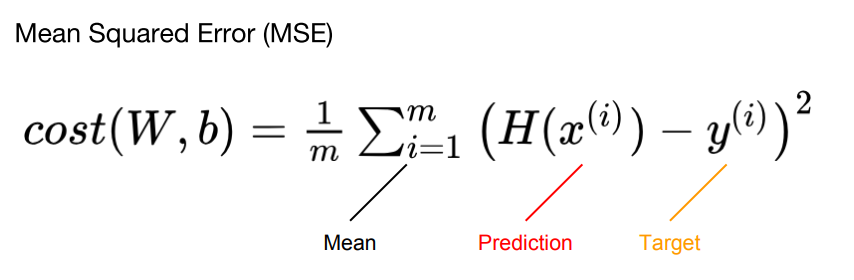

$ cost(W,b) = \frac{1}{m} \sum^{m}_{i=1} (H(x^{(i)}) - y^{(i)})^2 $

In [6]:
print("h(x) : ")
print(hypothesis)

h(x) : 
tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [7]:
print("y")
print(y_train)

y
tensor([[2.],
        [4.],
        [6.]])


In [8]:
print(hypothesis - y_train)

tensor([[-2.],
        [-4.],
        [-6.]], grad_fn=<SubBackward0>)


In [9]:
print((hypothesis - y_train) ** 2)

tensor([[ 4.],
        [16.],
        [36.]], grad_fn=<PowBackward0>)


In [10]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


### Gradient Descent

In [11]:
from torch import optim
optimizer = optim.SGD([W, b], lr=0.01)

In [12]:
optimizer.zero_grad() # gradient 초기화
cost.backward() # gradient 계산
optimizer.step() # 개선

In [13]:
print(W)
print(b)

tensor([0.1867], requires_grad=True)
tensor([0.0800], requires_grad=True)


#### Weight랑 bias받아온거로 cost 출력해봄

In [14]:
hypothesis = W * x_train + b
print(hypothesis)

tensor([[0.2667],
        [0.4533],
        [0.6400]], grad_fn=<AddBackward0>)


In [15]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(14.7710, grad_fn=<MeanBackward0>)


### Training with Full Code

In [16]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr = 0.01)

epochs = 1000
for epoch in range(epochs + 1):
    # H(x) 계산
    hypothesis = W * x_train + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch :[{:4d}/{}] W:{:.3f} b:{:.3f} cost: {:.4f}'.format(
            epoch, epochs, W.item(), b.item(), cost.item()
        ))

Epoch :[   0/1000] W:0.187 b:0.080 cost: 18.6667
Epoch :[ 100/1000] W:1.746 b:0.578 cost: 0.0482
Epoch :[ 200/1000] W:1.800 b:0.454 cost: 0.0298
Epoch :[ 300/1000] W:1.843 b:0.357 cost: 0.0184
Epoch :[ 400/1000] W:1.876 b:0.281 cost: 0.0114
Epoch :[ 500/1000] W:1.903 b:0.221 cost: 0.0070
Epoch :[ 600/1000] W:1.924 b:0.174 cost: 0.0043
Epoch :[ 700/1000] W:1.940 b:0.136 cost: 0.0027
Epoch :[ 800/1000] W:1.953 b:0.107 cost: 0.0017
Epoch :[ 900/1000] W:1.963 b:0.084 cost: 0.0010
Epoch :[1000/1000] W:1.971 b:0.066 cost: 0.0006


### High-level Implementation with nn.Module

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

이제 linear regression 모델을 만들면 되는데, 기본적으로 PyTorch의 모든 모델은 제공되는 nn.Module을 inherit 해서 만들게 됩니다.

In [18]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [19]:
model = LinearRegressionModel()

### Hypothesis

이제 모델을 생성해서 예측값  H(x) 를 구해보자

In [20]:
hypothesis = model(x_train)

In [21]:
print(hypothesis)

tensor([[0.7977],
        [1.3041],
        [1.8105]], grad_fn=<AddmmBackward>)


### Cost

이제 mean squared error (MSE) 로 cost를 구해보자. MSE 역시 PyTorch에서 기본적으로 제공한다.

In [22]:
print(hypothesis)
print(y_train)

tensor([[0.7977],
        [1.3041],
        [1.8105]], grad_fn=<AddmmBackward>)
tensor([[1.],
        [2.],
        [3.]])


In [23]:
cost = F.mse_loss(hypothesis, y_train)

In [24]:
print(cost)

tensor(0.6467, grad_fn=<MseLossBackward>)


### Gradient Descent

마지막 주어진 cost를 이용해 $H(x)$ 의 $W, b$ 를 바꾸어서 cost를 줄여봅니다.

In [25]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [26]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

### Training with Full Code

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [28]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화
model = LinearRegressionModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr = 0.01)

epochs = 1000
for epoch in range(epochs + 1):
    # H(x) 계산
    pred = model(x_train)

    # cost계산 
    cost = F.mse_loss(pred, y_train)

    # cost로 H(x)개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번 마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        
        print('Epoch [{:4d}/{}] W: {:.3f}, b: {:.3f} Cost: {:.4f}'.format(
            epoch, epochs, W, b, cost.item()
        ))

Epoch [   0/1000] W: 0.147, b: 0.117 Cost: 3.8011
Epoch [ 100/1000] W: 0.857, b: 0.324 Cost: 0.0152
Epoch [ 200/1000] W: 0.888, b: 0.255 Cost: 0.0094
Epoch [ 300/1000] W: 0.912, b: 0.201 Cost: 0.0058
Epoch [ 400/1000] W: 0.931, b: 0.158 Cost: 0.0036
Epoch [ 500/1000] W: 0.945, b: 0.124 Cost: 0.0022
Epoch [ 600/1000] W: 0.957, b: 0.097 Cost: 0.0014
Epoch [ 700/1000] W: 0.966, b: 0.077 Cost: 0.0008
Epoch [ 800/1000] W: 0.974, b: 0.060 Cost: 0.0005
Epoch [ 900/1000] W: 0.979, b: 0.047 Cost: 0.0003
Epoch [1000/1000] W: 0.984, b: 0.037 Cost: 0.0002


점점  H(x)  의  W  와  b  를 조정해서 cost가 줄어드는 것을 볼 수 있습니다